In [19]:
#Resale Flat Price Index
# Test comment 2
# Test comment 32
# Test for server1 commit
import tkinter as tk
from tkinter import font as tkFont  
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr 
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  NavigationToolbar2Tk)  
import random
import pandas as pd
import numpy as np
import math as math

In [20]:
class DataManager:

    def __init__(self): 
        self.df= None
        self.columns =None
        self.towns = None

    def readData(self,filename):
       
        self.df = pd.read_csv(filename )   
        self.columns = self.df.columns.tolist() 
        self.towns= self.df.loc[:,'town'].unique().tolist()  
        
        self.flatTypes= self.df.loc[:,'flat_type'].unique().tolist()

        # As for the one ROOM flat it is wrongly positioned at index 5, so we relocate it.
        newindex=0
        oldindex = 5
        self.flatTypes.insert(newindex, self.flatTypes.pop(oldindex)) 
 

    def getAveragePriceTown(self,town):
        dfTown = self.df[ self.df.loc[:,'town']==town] 
        noOfRows = len(dfTown)
        if noOfRows ==0:
            return 0
        total = dfTown.loc[:,'resale_price'].sum()
        avPrice = total/noOfRows
        avPrice = int(  round(avPrice,0))
        return avPrice

    def getMinMaxPriceTownType(self,town,type):
        dfTown = self.df[ (self.df.loc[:,'town']==town) & (self.df.loc[:,'flat_type']==type) ]
        min= dfTown.loc[:,'resale_price'].min()
        max= dfTown.loc[:,'resale_price'].max()
        return min,max

    def getPricesTownType(self,town,type):
        dfTownType = self.df[ (self.df.loc[:,'town']==town) & (self.df.loc[:,'flat_type']==type) ]  
        dfResalePrices = dfTownType.loc[:,'resale_price']  
        resalePrices = dfResalePrices.to_list()
        return resalePrices

    def getPricesTown(self,town):
        data = []
        for type in self.flatTypes: 
            resalePrices = self.getPricesTownType(town,type)
            data.append(resalePrices)
        return data


In [9]:
class ScreenManager:

    def __init__(self, window,winWidth,winHeight, dataManager):  
        self.screenManager = self 
        
        # We need access to data
        self.dataManager = dataManager 
        
        # Our application various screens
        self.startScreen = StartScreen(window,winWidth,winHeight, self.screenManager)
        self.menuScreen = MenuScreen(window,winWidth,winHeight, self.screenManager)
        self.byTownScreen = ByTownScreen(window,winWidth,winHeight, self.screenManager)
        self.byTownCanvas = ByTownCanvas(window, self.byTownScreen.midRightFrame, # master
                                            winWidth,winHeight, self.screenManager) 
        self.optionTwoScreen = OptionTwoScreen(window,winWidth,winHeight, self.screenManager)
       
    def loadScreen(self, screen): 
        if screen == 'START_SCREEN':
            self.startScreen.frame.grid(row=0, column=0, padx = 0, pady = 0)
        elif screen == 'MENU_SCREEN':
            self.menuScreen.frame.grid(row=0, column=0, padx = 0, pady = 0) 
        elif screen == 'BY_TOWN_SCREEN':
            self.byTownScreen.load()
        elif screen == 'OPTION_TWO_SCREEN':
            self.optionTwoScreen.frame.grid(row=0, column=0, padx = 0, pady = 0)  
    
    def unLoadScreen(self,screen):
        if screen == 'START_SCREEN':
            self.startScreen.frame.grid_forget()
        elif  screen == 'MENU_SCREEN':
            self.menuScreen.frame.grid_forget()
        elif  screen == 'BY_TOWN_SCREEN':
            self.byTownScreen.forget() 
        elif  screen == 'OPTION_TWO_SCREEN':
            self.optionTwoScreen.frame.grid_forget()

In [21]:
class StartScreen:

    def __init__(self,window,winWidth,winHeight,screenManager):

        # We need access to the ScreenManager
        self.screenManager = screenManager 
        
        # Set up a frame for our StartScreen
        self.frame =  tk.Frame(master=window,
                    width=winWidth,
                    height= winHeight , 
                    relief=tk.RAISED,
                    background = 'white',
                    borderwidth=1)      

        # Get ready all the widgets/items for this frame  
        self.helv36 = tkFont.Font(family='Helvetica',size=24, weight=tkFont.BOLD)
        screenTitleLabel = tk.Label(master=self.frame , text = 'Welcome to Resale Flat Prices Analyser',font = self.helv36, foreground='black', background ='white') 
        screenTitleLabel .place(x=0 ,y =0)  

        # Setup a Start Button and connect to a function (start)
        startButton = tk.Button(master=self.frame,text="Start",command=self.start, font =self.helv36) 
        startButton.place(x= 450 - 40, y=200)
    
    def start(self):   
        self.screenManager.unLoadScreen('START_SCREEN')
        self.screenManager.loadScreen('MENU_SCREEN') 

In [7]:
class MenuScreen:

    def __init__(self,window,winWidth,winHeight,screenManager):
        
        # We need access to the ScreenManager and Window
        self.screenManager = screenManager
        self.window = window 

        # Setting a frame for our screen
        self.frame =  tk.Frame(master=window,
                    width=winWidth,
                    height= winHeight , 
                    relief=tk.RAISED,
                    background = 'white',
                    borderwidth=1)      

        # Get ready all the widgets/items for this frame  
        self.fontMenuTitle = tkFont.Font(family='Helvetica',size=24, weight=tkFont.BOLD)
        self.font15 = tkFont.Font(family='Helvetica',size=15, weight=tkFont.BOLD)
        
        menuTitleLabel = tk.Label(master=self.frame , text = 'Menu', 
                font = self.fontMenuTitle, foreground='black', background ='white') 
        menuTitleLabel.place(x=400 ,y =140) 
        
        # Some variables to control placement
        shiftLeft = 100 
        menuItemGap = 60
        
        # Make and place the buttons on the frame
        optionOneButton = tk.Button(master=self.frame,text="By Town",
                    command=self.optionOne, font =self.font15, height = 1, width = 15)  
        optionOneButton.place(x= 450 - shiftLeft, y=200)

        optionTwoButton = tk.Button(master=self.frame,text="Option Two",
                    command=self.optionTwo, font =self.font15, height = 1, width = 15) 
        optionTwoButton.place(x= 450 - shiftLeft, y=200 + menuItemGap)

        optionThreeButton = tk.Button(master=self.frame,text="Exit",
                    command=self.exit, font =self.font15, height = 1, width = 15) 
        optionThreeButton.place(x= 450 - shiftLeft, y=200 +2*menuItemGap)
    
    def optionOne(self): 
        self.screenManager.unLoadScreen('MENU_SCREEN') 
        self.screenManager.loadScreen('BY_TOWN_SCREEN')  
        
    def optionTwo(self): 
        self.screenManager.unLoadScreen('MENU_SCREEN') 
        self.screenManager.loadScreen('OPTION_TWO_SCREEN')  

    def exit(self):
        self.window.destroy()

In [22]:
class ByTownScreen:

    def __init__(self,window,winWidth,winHeight,screenManager): 
    
        # We need access to Window, DataManager and ScreenManager
        self.window = window
        self.screenManager = screenManager   
        self.dataManager = self.screenManager.dataManager

        # Default, now adjustments needed
        self.winWidth = winWidth
        self.winHeight = winHeight  
        
        # Adjust Screen (if needed  to enlarge/shrink as tkinter may meddle with resolution)
        #self.winWidth = (int) (winWidth *  1.5)
        #self.winHeight = (int) (winHeight * 1.5)
        

        # Various stuff we need to build our frames
        self.fontTitle = tkFont.Font(family='Helvetica',size=24, weight=tkFont.BOLD)
        self.font12 = tkFont.Font(family='Helvetica',size=12, weight=tkFont.BOLD) 

        # Variable to control placement of widgest and frames
        self.TOP_FRAME_HEIGHT = 80
        self.BOTTOM_FRAME_HEIGHT = 50
        self.MID_FRAME_HEIGHT = self.winHeight - (self.TOP_FRAME_HEIGHT + self.BOTTOM_FRAME_HEIGHT)

        self.BACKGROUND_GREY = self.rgbTKinter(236,236,236)

        # Calculate width of graph frame as based on golden ratio
        goldenRatio = (1+ math.sqrt(5))/2 
        self.GRAPH_DISPLAY_FRAME_WIDTH= round(goldenRatio*self.MID_FRAME_HEIGHT,0) 
        self.GRAPH_CONTROL_FRAME_WIDTH= self.winWidth -  self.GRAPH_DISPLAY_FRAME_WIDTH

        # Our screen comprises three frames
        self.topFrame = self.createTopFrame()
        self.midFrame = self.createMidFrame()
        self.botFrame = self.createBotFrame() 
 
        # Our mid frame comprises two frames
        self.midLeftFrame = self.createMidLeftFrame()
        self.midLeftFrame.grid(row=0, column=0, padx = 0, pady = 0) 

        self.midRightFrame = self.createMidRightFrame()
        self.midRightFrame.grid(row=0, column=1, padx = 0, pady = 0)   
       
        
    def backToMenu(self): 
        self.screenManager.unLoadScreen('BY_TOWN_SCREEN') 
        self.screenManager.loadScreen('MENU_SCREEN')  

    def  handleTownMenu(self,choice):  
        self.selectedTown  = choice  
        self.screenManager.byTownCanvas.plot() 

    def createTopFrame(self):  

        topFrame =  tk.Frame(master=self.window,
                    width=self.winWidth,
                    height= self.TOP_FRAME_HEIGHT,
                    relief=tk.RAISED,
                    background = self.BACKGROUND_GREY,
                    borderwidth=2)      

        # Get ready all the widgets & items for this frame  
        optionTitleLabel = tk.Label(master=topFrame , text = 'Resale prices per town', 
        font = self.fontTitle, foreground='black', background =self.BACKGROUND_GREY) 
        optionTitleLabel.place(x=280 ,y = 10)   

        # Create a drop down menu for selecting the town 
        selectTownLabel = tk.Label(master=topFrame,font = self.font12,
            text="Select town:",background = self.BACKGROUND_GREY)  
        stringVar = tk.StringVar() 
    
        # The single star * unpacks the sequence/collectioninto positional arguments (starred expression)
        towns = self.screenManager.dataManager.towns
        stringVar.set(towns[0]) # Takes first Town in list
        self.selectedTown = towns[0]
        
        # Create the town selection drop down menu
        townMenu = tk.OptionMenu( topFrame, 
            stringVar,  *towns, 
            command=self.handleTownMenu)  
 
        # Place it
        selectTownLabel.place(x=665,y=25) 
        townMenu.place(x=765,y=25)   
        
        return topFrame

    def createMidFrame(self): # For Graph Display and Control 
        midFrame =  tk.Frame(master=self.window,
                    width=self.winWidth,
                    height= self.MID_FRAME_HEIGHT,  
                    relief=tk.RAISED,
                    background = 'white',
                    borderwidth=1)  
        return midFrame      

    def createMidLeftFrame(self): 
        midLeftFrame = tk.Frame(master=self.midFrame,
                    width=self.GRAPH_CONTROL_FRAME_WIDTH,
                    height= self.MID_FRAME_HEIGHT,  
                    relief=tk.RAISED,
                    background = self.BACKGROUND_GREY,
                    borderwidth=1) 

        # Setting up a legend for out boxplot by using a label
        legendText = "Flat types:\n----------------\n\n"
        for i in range( len(self.dataManager.flatTypes)):
            legendText+= str(i+1)+": " + self.dataManager.flatTypes[i] + "\n\n"  

        legendTextLabel = tk.Label(master=midLeftFrame,font = self.font12,
        text=legendText,background = self.BACKGROUND_GREY,  justify='left',anchor='w') 

        legendTextLabel.place(x=10,y=10)  
        return midLeftFrame


    def createMidRightFrame(self): 
        midRightFrame = tk.Frame(master=self.midFrame,
                    width=self.GRAPH_DISPLAY_FRAME_WIDTH,
                    height= self.MID_FRAME_HEIGHT,  
                    relief=tk.RAISED,
                    background = 'white',
                    borderwidth=1)
        return midRightFrame


    def createBotFrame(self): 
        botFrame =  tk.Frame(master=self.window,
                    width=self.winWidth,
                    height=self.BOTTOM_FRAME_HEIGHT,  
                    relief=tk.RAISED,
                    background = self.BACKGROUND_GREY,
                    borderwidth=2) 
        backToMenuButton = tk.Button(master=botFrame,text="Back to menu",
        command=self.backToMenu, font =self.font12) 
        backToMenuButton.place(x= 10, y=5)  
        return botFrame      

    def load(self):
        self.topFrame.grid(row=0, column=0, padx = 0, pady = 0) 
        self.midFrame.grid(row=1, column=0, padx = 0, pady = 0) 
        self.botFrame.grid(row=2, column=0, padx = 0, pady = 0)  
        self.screenManager.byTownCanvas.plot()

    def forget(self):
        self.topFrame.grid_forget()
        self.midFrame.grid_forget()
        self.botFrame.grid_forget()

    def rgbTKinter(self,r,g,b):   
        return f'#{r:02x}{g:02x}{b:02x}'

In [23]:
class OptionTwoScreen:

    def __init__(self,window,winWidth,winHeight,screenManager):
        self.screenManager = screenManager

        self.fontTitle = tkFont.Font(family='Helvetica',
             size=48, weight=tkFont.BOLD)
        self.font12 = tkFont.Font(family='Helvetica',
             size=12, weight=tkFont.BOLD)

        self.frame =  tk.Frame(master=window,
                    width=winWidth,
                    height= winHeight , 
                    relief=tk.RAISED,
                    background = 'green',
                    borderwidth=1)      

        # Get ready all the widgets & items for this frame   
        optionTitleLabel = tk.Label(master=self.frame , text = 'Option Two', 
        font = self.fontTitle, foreground='white', background ='green') 
        optionTitleLabel.place(x=0 ,y =0) 

        backToMenuButton = tk.Button(master=self.frame,text="Back to menu",
                    command=self.backToMenu, font =self.font12) 
        backToMenuButton.place(x= 20, y=450)
    
    def backToMenu(self): 
        self.screenManager.unLoadScreen('OPTION_TWO_SCREEN') 
        self.screenManager.loadScreen('MENU_SCREEN')  

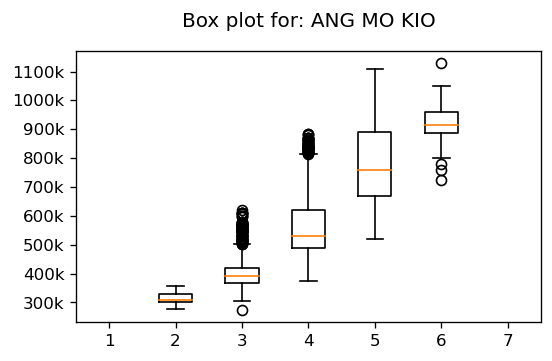

In [37]:
#-------------------------------------------------------------
# Function for setting up a tkinter window 
#-------------------------------------------------------------
def setUpTKinterWindow(winWidth,winHeight): 
    # Setting up our tkinter window
    window = tk.Tk()
    window.resizable(width=False, height=False) # Non resizable 
    window.title("Resale Flat Prices")
    return window

#-------------------------------------------------------------
# Main program
#-------------------------------------------------------------
 
# Size of our window
winWidth = 900
winHeight = 500 

# Set up our tkinter window
window = setUpTKinterWindow(winWidth,winHeight) 
 
# Get our DataManager up
dataManager = DataManager()

# Make sure you downloaded the data file and placed in a folder named data (together were your notebook is)
dataManager.readData('C:/Users/Anusha Kannapiran/Documents/Anusha Developments/Projects/data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

# Get our ScreenManager up
screenManager = ScreenManager(window,winWidth,winHeight,dataManager) 
 
# Load the start screen
screenManager.loadScreen('START_SCREEN') 

# Run the main loop  
window.mainloop()